COVID-19 US County JHU Data & Demographics9

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import openpyxl
import plotly.express as px
import plotly.graph_objects as go

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import linregress

import folium 
from folium import plugins

In [2]:
# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'

pd.set_option('max_columns',100)
pd.set_option('max_rows',100)

In [3]:
# Download data
df = pd.read_csv("E:/github/COVID-19 US County JHU Data & Demographics/forecast_future_dfs_2021-03-21.csv")
df

ds       trend  confirmed  yhat_lower  yhat_upper  trend_lower  \
0    3/21/2021  148.303580        457         394         519   148.303580   
1    3/22/2021  141.045055        374         310         433   141.045055   
2    3/23/2021  133.786531        407         350         471   133.786531   
3    3/24/2021  126.528006        397         339         463   126.175618   
4    3/25/2021  119.269482        390         330         452   118.079703   
..         ...         ...        ...         ...         ...          ...   
485  3/23/2021   -1.062684         -2         -16          12    -1.062684   
486  3/24/2021   -1.427062         -3         -15          11    -1.427975   
487  3/25/2021   -1.791441         -5         -17           9    -1.819415   
488  3/26/2021   -2.155819         -3         -17          11    -2.212902   
489  3/27/2021   -2.520198         -6         -19           7    -2.616409   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     148.303580       -1.556719             -1.556719             -1.556719   
1     141.045055        5.223006              5.223006              5.223006   
2     133.786531        8.269180              8.269180              8.269180   
3     126.924149       11.163947             11.163947             11.163947   
4     120.499371       19.470830             19.470830             19.470830   
..           ...             ...                   ...                   ...   
485    -1.062684        0.000000              0.000000              0.000000   
486    -1.416807        0.000000              0.000000              0.000000   
487    -1.751976        0.000000              0.000000              0.000000   
488    -2.073984        0.000000              0.000000              0.000000   
489    -2.401451        0.000000              0.000000              0.000000   

      holidays  holidays_lower  holidays_upper  multiplicative_terms  \
0    -1.556719       -1.556719       -1.556719              2.093089   
1     5.223006        5.223006        5.223006              1.614938   
2     8.269180        8.269180        8.269180              1.981827   
3    11.163947       11.163947       11.163947              2.052512   
4    19.470830       19.470830       19.470830              2.105482   
..         ...             ...             ...                   ...   
485   0.000000        0.000000        0.000000              0.588131   
486   0.000000        0.000000        0.000000              0.882363   
487   0.000000        0.000000        0.000000              1.690394   
488   0.000000        0.000000        0.000000              0.252979   
489   0.000000        0.000000        0.000000              1.562826   

     multiplicative_terms_lower  multiplicative_terms_upper    weekly  \
0                      2.093089                    2.093089  2.093089   
1                      1.614938                    1.614938  1.614938   
2                      1.981827                    1.981827  1.981827   
3                      2.052512                    2.052512  2.052512   
4                      2.105482                    2.105482  2.105482   
..                          ...                         ...       ...   
485                    0.588131                    0.588131  0.588131   
486                    0.882363                    0.882363  0.882363   
487                    1.690394                    1.690394  1.690394   
488                    0.252979                    0.252979  0.252979   
489                    1.562826                    1.562826  1.562826   

     weekly_lower  weekly_upper  country  
0        2.093089      2.093089  Albania  
1        1.614938      1.614938  Albania  
2        1.981827      1.981827  Albania  
3        2.052512      2.052512  Albania  
4        2.105482      2.105482  Albania  
..            ...           ...      ...  
485      0.588131      0.588131  Vietnam  
486      0.882363      0.882

In [4]:
forecast_dates = list(np.array(df.tail(7).ds.tolist()))
forecast_dates

['3/21/2021',
 '3/22/2021',
 '3/23/2021',
 '3/24/2021',
 '3/25/2021',
 '3/26/2021',
 '3/27/2021']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ds                          490 non-null    object 
 1   trend                       490 non-null    float64
 2   confirmed                   490 non-null    int64  
 3   yhat_lower                  490 non-null    int64  
 4   yhat_upper                  490 non-null    int64  
 5   trend_lower                 490 non-null    float64
 6   trend_upper                 490 non-null    float64
 7   additive_terms              490 non-null    float64
 8   additive_terms_lower        490 non-null    float64
 9   additive_terms_upper        490 non-null    float64
 10  holidays                    476 non-null    float64
 11  holidays_lower              476 non-null    float64
 12  holidays_upper              476 non-null    float64
 13  multiplicative_terms        490 non

In [6]:
df = df[['ds', 'trend', 'country']]
df

ds       trend  country
0    3/21/2021  148.303580  Albania
1    3/22/2021  141.045055  Albania
2    3/23/2021  133.786531  Albania
3    3/24/2021  126.528006  Albania
4    3/25/2021  119.269482  Albania
..         ...         ...      ...
485  3/23/2021   -1.062684  Vietnam
486  3/24/2021   -1.427062  Vietnam
487  3/25/2021   -1.791441  Vietnam
488  3/26/2021   -2.155819  Vietnam
489  3/27/2021   -2.520198  Vietnam

[490 rows x 3 columns]

In [7]:
df2 = pd.pivot_table(df, values='trend', index='ds', columns='country')
df_cols = df2.columns
df2

country       Albania    Argentina  Australia      Austria  Bangladesh  \
ds                                                                       
3/17/2021         NaN          NaN        NaN          NaN         NaN   
3/18/2021         NaN          NaN        NaN          NaN         NaN   
3/19/2021         NaN          NaN        NaN          NaN         NaN   
3/20/2021         NaN          NaN        NaN          NaN         NaN   
3/21/2021  148.303580  2693.046322   2.354609  1027.473401  673.735655   
3/22/2021  141.045055  2718.258444   2.341782  1043.239215  704.054527   
3/23/2021  133.786531  2743.470566   2.328956  1059.005030  734.373399   
3/24/2021  126.528006  2768.682687   2.316129  1074.770845  764.692270   
3/25/2021  119.269482  2793.894809   2.303303  1090.536660  795.011142   
3/26/2021  112.010957  2819.106931   2.290477  1106.302475  825.330014   
3/27/2021  104.752432  2844.319052   2.277650  1122.068290  855.648886   

country       Belarus      Belgium       Brazil     Bulgaria    Burundi  \
ds                                                                        
3/17/2021         NaN          NaN          NaN          NaN        NaN   
3/18/2021         NaN          NaN          NaN          NaN        NaN   
3/19/2021         NaN          NaN          NaN          NaN        NaN   
3/20/2021         NaN  1194.511712          NaN          NaN  14.885553   
3/21/2021  398.916344  1222.769740  35468.66007  1357.463257  14.864231   
3/22/2021  394.572503  1251.027767  35840.94441  1397.165361  14.842909   
3/23/2021  390.228662  1279.285794  36213.22876  1436.867466  14.821588   
3/24/2021  385.884821  1307.543822  36585.51310  1476.569571  14.800266   
3/25/2021  381.540979  1335.801849  36957.79744  1516.271676  14.778944   
3/26/2021  377.197138  1364.059877  37330.08179  1555.973780  14.757622   
3/27/2021  372.853297          NaN  37702.36613  1595.675885        NaN   

country         Canada        Chile     China     Colombia     Croatia  \
ds                                                                       
3/17/2021          NaN          NaN       NaN          NaN         NaN   
3/18/2021          NaN          NaN       NaN          NaN         NaN   
3/19/2021          NaN          NaN       NaN          NaN         NaN   
3/20/2021          NaN          NaN       NaN          NaN         NaN   
3/21/2021  1541.227770  2318.019146 -4.316395  1673.436599  324.974617   
3/22/2021  1550.720180  2352.568358 -4.971003  1705.508321  334.573502   
3/23/2021  1560.212591  2387.117570 -5.625612  1737.580043  344.172386   
3/24/2021  1569.705001  2421.666782 -6.280220  1769.651765  353.771271   
3/25/2021  1579.197411  2456.215994 -6.934829  1801.723487  363.370156   
3/26/2021  1588.689822  2490.765206 -7.589437  1833.795209  372.969041   
3/27/2021  1598.182232  2525.314419 -8.244046  1865.866931  382.567926   

country        Czechia     Denmark  Dominican Republic       Egypt  \
ds                                                                   
3/17/2021          NaN         NaN                 NaN         NaN   
3/18/2021          NaN         NaN                 NaN         NaN   
3/19/2021          NaN         NaN                 NaN         NaN   
3/20/2021          NaN         NaN                 NaN         NaN   
3/21/2021  3020.097755  279.866210          120.339297  186.605683   
3/22/2021  2961.888227  283.818689          113.286586  186.981341   
3/23/2021  2903.678700  287.771169          106.233874  187.356999   
3/24/2021  2845.469172  291.723649           99.181163  187.732656   
3/25/2021  2787.259644  295.676129           92.128451  188.108314   
3/26/2021  2729.050116  299.628608           85.075740  188.483972   
3/27/2021  2670.840588  303.581088           78.023028  188.859630   

country       Estonia     Finland       France     Georgia      Germany  \
ds                                                                        
3/17/2021         NaN         NaN    

In [8]:
# Coutries with delay 1 day
df2_add = df2[['Belgium', 'Burundi', 'Iceland', 'Luxembourg', 'Peru', 'Sweden', 'Switzerland', 'Thailand']]
df2_add

country        Belgium    Burundi   Iceland  Luxembourg         Peru  \
ds                                                                     
3/17/2021          NaN        NaN       NaN         NaN          NaN   
3/18/2021          NaN        NaN       NaN         NaN          NaN   
3/19/2021          NaN        NaN       NaN         NaN          NaN   
3/20/2021  1194.511712  14.885553  0.570937  115.893409  4235.014605   
3/21/2021  1222.769740  14.864231  0.538499  116.665194  4239.647768   
3/22/2021  1251.027767  14.842909  0.506061  117.436978  4244.280931   
3/23/2021  1279.285794  14.821588  0.473623  118.208763  4248.914095   
3/24/2021  1307.543822  14.800266  0.441185  118.980548  4253.547258   
3/25/2021  1335.801849  14.778944  0.408747  119.752332  4258.180421   
3/26/2021  1364.059877  14.757622  0.376309  120.524117  4262.813585   
3/27/2021          NaN        NaN       NaN         NaN          NaN   

country         Sweden  Switzerland   Thailand  
ds                                              
3/17/2021          NaN          NaN        NaN  
3/18/2021          NaN          NaN        NaN  
3/19/2021          NaN          NaN        NaN  
3/20/2021  3252.906035   690.437489  36.245991  
3/21/2021  3279.945374   701.229776  37.334600  
3/22/2021  3306.984714   712.022062  38.423210  
3/23/2021  3334.024054   722.814349  39.511820  
3/24/2021  3361.063393   733.606635  40.600430  
3/25/2021  3388.102733   744.398922  41.689040  
3/26/2021  3415.142072   755.191208  42.777649  
3/27/2021          NaN          NaN        NaN

In [9]:
df2_add = df2_add[3:10]
forecast_dates_add = df2_add.index.tolist()
df2_add

country        Belgium    Burundi   Iceland  Luxembourg         Peru  \
ds                                                                     
3/20/2021  1194.511712  14.885553  0.570937  115.893409  4235.014605   
3/21/2021  1222.769740  14.864231  0.538499  116.665194  4239.647768   
3/22/2021  1251.027767  14.842909  0.506061  117.436978  4244.280931   
3/23/2021  1279.285794  14.821588  0.473623  118.208763  4248.914095   
3/24/2021  1307.543822  14.800266  0.441185  118.980548  4253.547258   
3/25/2021  1335.801849  14.778944  0.408747  119.752332  4258.180421   
3/26/2021  1364.059877  14.757622  0.376309  120.524117  4262.813585   

country         Sweden  Switzerland   Thailand  
ds                                              
3/20/2021  3252.906035   690.437489  36.245991  
3/21/2021  3279.945374   701.229776  37.334600  
3/22/2021  3306.984714   712.022062  38.423210  
3/23/2021  3334.024054   722.814349  39.511820  
3/24/2021  3361.063393   733.606635  40.600430  
3/25/2021  3388.102733   744.398922  41.689040  
3/26/2021  3415.142072   755.191208  42.777649

In [10]:
ds_start_add = df2_add.index.tolist()[0]
ds_start_add

'3/20/2021'

In [11]:
ds_end_add = df2_add.index.tolist()[-1]
ds_end_add

'3/26/2021'

In [12]:
df2 = df2[4:11]
df2

country       Albania    Argentina  Australia      Austria  Bangladesh  \
ds                                                                       
3/21/2021  148.303580  2693.046322   2.354609  1027.473401  673.735655   
3/22/2021  141.045055  2718.258444   2.341782  1043.239215  704.054527   
3/23/2021  133.786531  2743.470566   2.328956  1059.005030  734.373399   
3/24/2021  126.528006  2768.682687   2.316129  1074.770845  764.692270   
3/25/2021  119.269482  2793.894809   2.303303  1090.536660  795.011142   
3/26/2021  112.010957  2819.106931   2.290477  1106.302475  825.330014   
3/27/2021  104.752432  2844.319052   2.277650  1122.068290  855.648886   

country       Belarus      Belgium       Brazil     Bulgaria    Burundi  \
ds                                                                        
3/21/2021  398.916344  1222.769740  35468.66007  1357.463257  14.864231   
3/22/2021  394.572503  1251.027767  35840.94441  1397.165361  14.842909   
3/23/2021  390.228662  1279.285794  36213.22876  1436.867466  14.821588   
3/24/2021  385.884821  1307.543822  36585.51310  1476.569571  14.800266   
3/25/2021  381.540979  1335.801849  36957.79744  1516.271676  14.778944   
3/26/2021  377.197138  1364.059877  37330.08179  1555.973780  14.757622   
3/27/2021  372.853297          NaN  37702.36613  1595.675885        NaN   

country         Canada        Chile     China     Colombia     Croatia  \
ds                                                                       
3/21/2021  1541.227770  2318.019146 -4.316395  1673.436599  324.974617   
3/22/2021  1550.720180  2352.568358 -4.971003  1705.508321  334.573502   
3/23/2021  1560.212591  2387.117570 -5.625612  1737.580043  344.172386   
3/24/2021  1569.705001  2421.666782 -6.280220  1769.651765  353.771271   
3/25/2021  1579.197411  2456.215994 -6.934829  1801.723487  363.370156   
3/26/2021  1588.689822  2490.765206 -7.589437  1833.795209  372.969041   
3/27/2021  1598.182232  2525.314419 -8.244046  1865.866931  382.567926   

country        Czechia     Denmark  Dominican Republic       Egypt  \
ds                                                                   
3/21/2021  3020.097755  279.866210          120.339297  186.605683   
3/22/2021  2961.888227  283.818689          113.286586  186.981341   
3/23/2021  2903.678700  287.771169          106.233874  187.356999   
3/24/2021  2845.469172  291.723649           99.181163  187.732656   
3/25/2021  2787.259644  295.676129           92.128451  188.108314   
3/26/2021  2729.050116  299.628608           85.075740  188.483972   
3/27/2021  2670.840588  303.581088           78.023028  188.859630   

country       Estonia     Finland       France     Georgia      Germany  \
ds                                                                        
3/21/2021  647.168216  318.979843  10505.14060  106.966700  6251.513569   
3/22/2021  649.714712  322.713411  10550.30569  105.771384  6383.373612   
3/23/2021  652.261207  326.446979  10595.47078  104.576068  6515.233656   
3/24/2021  654.807703  330.180547  10640.63587  103.380752  6647.093699   
3/25/2021  657.354198  333.914115  10685.80096  102.185435  6778.953742   
3/26/2021  659.900693  337.647682  10730.96606  100.990119  6910.813785   
3/27/2021  662.447189  341.381250  10776.13115   99.794803  7042.673828   

country        Greece    Honduras      Hungary   Iceland        India  \
ds                                                                      
3/21/2021  868.261209  246.628921  3414.312229  0.538499  13960.21871   
3/22/2021  879.426404  242.092758  3497.303113  0.506061  14484.25998   
3/23/2021  890.591600  237.556594  3580.293996  0.473623  15008.30124   
3/24/2021  901.756795  233.020431  3663.284880  0.441185  15532.34250   
3/25/2021  912.921990  228.484267  3746.275763  0.408747  16056.38376   
3/26/2021  924.087186  223.948104  3829.266647  0.376309  16580.42503   
3/27/2021  935.252381  219.411940  3912.257530       NaN  17104.46629   

country      Indonesia   

In [13]:
ds_start = df2.index.tolist()[0]
ds_start

'3/21/2021'

In [14]:
ds_end = df2.index.tolist()[-1]
ds_end

'3/27/2021'

In [15]:
# EDA for countries
df3 = df2.T
df3.columns = forecast_dates
df3

3/21/2021     3/22/2021     3/23/2021     3/24/2021  \
country                                                                      
Albania               148.303580    141.045055    133.786531    126.528006   
Argentina            2693.046322   2718.258444   2743.470566   2768.682687   
Australia               2.354609      2.341782      2.328956      2.316129   
Austria              1027.473401   1043.239215   1059.005030   1074.770845   
Bangladesh            673.735655    704.054527    734.373399    764.692270   
Belarus               398.916344    394.572503    390.228662    385.884821   
Belgium              1222.769740   1251.027767   1279.285794   1307.543822   
Brazil              35468.660070  35840.944410  36213.228760  36585.513100   
Bulgaria             1357.463257   1397.165361   1436.867466   1476.569571   
Burundi                14.864231     14.842909     14.821588     14.800266   
Canada               1541.227770   1550.720180   1560.212591   1569.705001   
Chile                2318.019146   2352.568358   2387.117570   2421.666782   
China                  -4.316395     -4.971003     -5.625612     -6.280220   
Colombia             1673.436599   1705.508321   1737.580043   1769.651765   
Croatia               324.974617    334.573502    344.172386    353.771271   
Czechia              3020.097755   2961.888227   2903.678700   2845.469172   
Denmark               279.866210    283.818689    287.771169    291.723649   
Dominican Republic    120.339297    113.286586    106.233874     99.181163   
Egypt                 186.605683    186.981341    187.356999    187.732656   
Estonia               647.168216    649.714712    652.261207    654.807703   
Finland               318.979843    322.713411    326.446979    330.180547   
France              10505.140600  10550.305690  10595.470780  10640.635870   
Georgia               106.966700    105.771384    104.576068    103.380752   
Germany              6251.513569   6383.373612   6515.233656   6647.093699   
Greece                868.261209    879.426404    890.591600    901.756795   
Honduras              246.628921    242.092758    237.556594    233.020431   
Hungary              3414.312229   3497.303113   3580.293996   3663.284880   
Iceland                 0.538499      0.506061      0.473623      0.441185   
India               13960.218710  14484.259980  15008.301240  15532.342500   
Indonesia            1922.403810   1890.445788   1858.487766   1826.529745   
Ireland               165.502460    164.029403    162.556346    161.083289   
Israel                431.246230    392.793138    354.340047    315.886955   
Italy                6996.319651   7050.672917   7105.026184   7159.379450   
Japan                 464.740762    472.920763    481.100764    489.280765   
Kenya                 386.001252    400.949861    415.898470    430.847078   
Korea, Republic of    129.676541    130.197036    130.717532    131.238028   
Latvia                287.255276    283.415639    279.576001    275.736364   
Lithuania             191.160951    190.015590    188.870229    187.724868   
Luxembourg            116.665194    117.436978    118.208763    118.980548   
Malaysia              426.699389    406.503660    386.307931    366.112202   
Mexico               1638.986483   1578.075217   1517.163951   1456.252685   
Moldova               575.393103    580.262236    585.131369    590.000502   
Morocco               166.276523    166.688130    167.099738    167.511345   
Netherlands          1960.870969   1999.023987   2037.177005   2075.330023   
New Zealand             1.362221      1.357761      1.353301      1.348840   
Nicaragua               9.979771      9.934893      9.890016           NaN   
Nigeria                14.197079      3.815204     -6.566670    -16.948545   
Norway                368.069268    378.097123    388.124977    398.152831   
Pakistan             1256.539237   1294.830876   1333.122515   1371.414155   
Paraguay              965.925896    988.07933

In [16]:
def plot_feature_parallel(df, title):
    # Draw sns.parallel_coordinates for features of the given df
    
    plt.figure(figsize=(15,6))
    parallel_coordinates(df, 'country', colormap=plt.get_cmap("tab20c"), lw=3)
    plt.title(title)
    plt.xlabel("Dates")
    plt.ylabel("New cases")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig('graph.png')
    plt.show()

In [17]:
df3 = df3.dropna()
df3 = df3.reset_index(drop=False)

In [18]:
# Countries with delay 1 day
df3_add = df2_add.T
df3_add.columns = forecast_dates_add
df3_add = df3_add.dropna().reset_index(drop=False)
df3_add

country    3/20/2021    3/21/2021    3/22/2021    3/23/2021  \
0      Belgium  1194.511712  1222.769740  1251.027767  1279.285794   
1      Burundi    14.885553    14.864231    14.842909    14.821588   
2      Iceland     0.570937     0.538499     0.506061     0.473623   
3   Luxembourg   115.893409   116.665194   117.436978   118.208763   
4         Peru  4235.014605  4239.647768  4244.280931  4248.914095   
5       Sweden  3252.906035  3279.945374  3306.984714  3334.024054   
6  Switzerland   690.437489   701.229776   712.022062   722.814349   
7     Thailand    36.245991    37.334600    38.423210    39.511820   

     3/24/2021    3/25/2021    3/26/2021  
0  1307.543822  1335.801849  1364.059877  
1    14.800266    14.778944    14.757622  
2     0.441185     0.408747     0.376309  
3   118.980548   119.752332   120.524117  
4  4253.547258  4258.180421  4262.813585  
5  3361.063393  3388.102733  3415.142072  
6   733.606635   744.398922   755.191208  
7    40.600430    41.689040    42.777649

In [19]:
# Calculation slope of all trends
df3['slope_n'] = 0
df3['slope'] = 0
x = np.array(range(7))
for i in range(len(df3)):
    y = df3.iloc[i, 1:8].astype(float).values
    df3.loc[i,'slope'] = linregress(x, y)[0]
    df3.loc[i,'slope_n'] = df3.loc[i,ds_end] - df3.loc[i,ds_start]
df3

country     3/21/2021     3/22/2021     3/23/2021  \
0              Albania    148.303580    141.045055    133.786531   
1            Argentina   2693.046322   2718.258444   2743.470566   
2            Australia      2.354609      2.341782      2.328956   
3              Austria   1027.473401   1043.239215   1059.005030   
4           Bangladesh    673.735655    704.054527    734.373399   
5              Belarus    398.916344    394.572503    390.228662   
6               Brazil  35468.660070  35840.944410  36213.228760   
7             Bulgaria   1357.463257   1397.165361   1436.867466   
8               Canada   1541.227770   1550.720180   1560.212591   
9                Chile   2318.019146   2352.568358   2387.117570   
10               China     -4.316395     -4.971003     -5.625612   
11            Colombia   1673.436599   1705.508321   1737.580043   
12             Croatia    324.974617    334.573502    344.172386   
13             Czechia   3020.097755   2961.888227   2903.678700   
14             Denmark    279.866210    283.818689    287.771169   
15  Dominican Republic    120.339297    113.286586    106.233874   
16               Egypt    186.605683    186.981341    187.356999   
17             Estonia    647.168216    649.714712    652.261207   
18             Finland    318.979843    322.713411    326.446979   
19              France  10505.140600  10550.305690  10595.470780   
20             Georgia    106.966700    105.771384    104.576068   
21             Germany   6251.513569   6383.373612   6515.233656   
22              Greece    868.261209    879.426404    890.591600   
23            Honduras    246.628921    242.092758    237.556594   
24             Hungary   3414.312229   3497.303113   3580.293996   
25               India  13960.218710  14484.259980  15008.301240   
26           Indonesia   1922.403810   1890.445788   1858.487766   
27             Ireland    165.502460    164.029403    162.556346   
28              Israel    431.246230    392.793138    354.340047   
29               Italy   6996.319651   7050.672917   7105.026184   
30               Japan    464.740762    472.920763    481.100764   
31               Kenya    386.001252    400.949861    415.898470   
32  Korea, Republic of    129.676541    130.197036    130.717532   
33              Latvia    287.255276    283.415639    279.576001   
34           Lithuania    191.160951    190.015590    188.870229   
35            Malaysia    426.699389    406.503660    386.307931   
36              Mexico   1638.986483   1578.075217   1517.163951   
37             Moldova    575.393103    580.262236    585.131369   
38             Morocco    166.276523    166.688130    167.099738   
39         Netherlands   1960.870969   1999.023987   2037.177005   
40         New Zealand      1.362221      1.357761      1.353301   
41             Nigeria     14.197079      3.815204     -6.566670   
42              Norway    368.069268    378.097123    388.124977   
43            Pakistan   1256.539237   1294.830876   1333.122515   
44            Paraguay    965.925896    988.079331   1010.232766   
45         Philippines   2452.697069   2541.124938   2629.552807   
46              Poland   8155.555186   8385.040839   8614.526491   
47            Portugal    126.571286    120.112054    113.652822   
48             Romania   1965.443886   2001.392021   2037.340157   
49  Russian Federation   3333.828531   3310.680479   3287.532426   
50              Serbia   1647.033162   1674.534111   1702.035061   
51           Singapore      3.058074      2.958671      2.859269   
52            Slovakia    677.596654    663.450633    649.304612   
53            Slovenia    307.299532    307.071130    306.842728   
54        South Africa    376.876603    378.286910    379.697217   
55              Turkey   5225.185526   5306.561626   5387.937725   
56             Ukraine   4914.377224   5041.895948   5169.414671   
57      United Kingdom   1575.641904   1548.722119   1521.802334   
58 

In [20]:
# Calculation slope of trends for countries with delay 1 day
df3_add['slope_n'] = 0
df3_add['slope'] = 0
x = np.array(range(7))
for i in range(len(df3_add)):
    y = df3_add.iloc[i, 1:8].astype(float).values
    df3_add.loc[i,'slope'] = linregress(x, y)[0]
    df3_add.loc[i,'slope_n'] = df3_add.loc[i,ds_end_add] - df3_add.loc[i,ds_start_add]
df3_add

country    3/20/2021    3/21/2021    3/22/2021    3/23/2021  \
0      Belgium  1194.511712  1222.769740  1251.027767  1279.285794   
1      Burundi    14.885553    14.864231    14.842909    14.821588   
2      Iceland     0.570937     0.538499     0.506061     0.473623   
3   Luxembourg   115.893409   116.665194   117.436978   118.208763   
4         Peru  4235.014605  4239.647768  4244.280931  4248.914095   
5       Sweden  3252.906035  3279.945374  3306.984714  3334.024054   
6  Switzerland   690.437489   701.229776   712.022062   722.814349   
7     Thailand    36.245991    37.334600    38.423210    39.511820   

     3/24/2021    3/25/2021    3/26/2021     slope_n      slope  
0  1307.543822  1335.801849  1364.059877  169.548165  28.258027  
1    14.800266    14.778944    14.757622   -0.127931  -0.021322  
2     0.441185     0.408747     0.376309   -0.194628  -0.032438  
3   118.980548   119.752332   120.524117    4.630708   0.771785  
4  4253.547258  4258.180421  4262.813585   27.798980   4.633163  
5  3361.063393  3388.102733  3415.142072  162.236037  27.039340  
6   733.606635   744.398922   755.191208   64.753719  10.792287  
7    40.600430    41.689040    42.777649    6.531659   1.088610

In [21]:
df3.sort_values(by=['country'])

country     3/21/2021     3/22/2021     3/23/2021  \
0              Albania    148.303580    141.045055    133.786531   
1            Argentina   2693.046322   2718.258444   2743.470566   
2            Australia      2.354609      2.341782      2.328956   
3              Austria   1027.473401   1043.239215   1059.005030   
4           Bangladesh    673.735655    704.054527    734.373399   
5              Belarus    398.916344    394.572503    390.228662   
6               Brazil  35468.660070  35840.944410  36213.228760   
7             Bulgaria   1357.463257   1397.165361   1436.867466   
8               Canada   1541.227770   1550.720180   1560.212591   
9                Chile   2318.019146   2352.568358   2387.117570   
10               China     -4.316395     -4.971003     -5.625612   
11            Colombia   1673.436599   1705.508321   1737.580043   
12             Croatia    324.974617    334.573502    344.172386   
13             Czechia   3020.097755   2961.888227   2903.678700   
14             Denmark    279.866210    283.818689    287.771169   
15  Dominican Republic    120.339297    113.286586    106.233874   
16               Egypt    186.605683    186.981341    187.356999   
17             Estonia    647.168216    649.714712    652.261207   
18             Finland    318.979843    322.713411    326.446979   
19              France  10505.140600  10550.305690  10595.470780   
20             Georgia    106.966700    105.771384    104.576068   
21             Germany   6251.513569   6383.373612   6515.233656   
22              Greece    868.261209    879.426404    890.591600   
23            Honduras    246.628921    242.092758    237.556594   
24             Hungary   3414.312229   3497.303113   3580.293996   
25               India  13960.218710  14484.259980  15008.301240   
26           Indonesia   1922.403810   1890.445788   1858.487766   
27             Ireland    165.502460    164.029403    162.556346   
28              Israel    431.246230    392.793138    354.340047   
29               Italy   6996.319651   7050.672917   7105.026184   
30               Japan    464.740762    472.920763    481.100764   
31               Kenya    386.001252    400.949861    415.898470   
32  Korea, Republic of    129.676541    130.197036    130.717532   
33              Latvia    287.255276    283.415639    279.576001   
34           Lithuania    191.160951    190.015590    188.870229   
35            Malaysia    426.699389    406.503660    386.307931   
36              Mexico   1638.986483   1578.075217   1517.163951   
37             Moldova    575.393103    580.262236    585.131369   
38             Morocco    166.276523    166.688130    167.099738   
39         Netherlands   1960.870969   1999.023987   2037.177005   
40         New Zealand      1.362221      1.357761      1.353301   
41             Nigeria     14.197079      3.815204     -6.566670   
42              Norway    368.069268    378.097123    388.124977   
43            Pakistan   1256.539237   1294.830876   1333.122515   
44            Paraguay    965.925896    988.079331   1010.232766   
45         Philippines   2452.697069   2541.124938   2629.552807   
46              Poland   8155.555186   8385.040839   8614.526491   
47            Portugal    126.571286    120.112054    113.652822   
48             Romania   1965.443886   2001.392021   2037.340157   
49  Russian Federation   3333.828531   3310.680479   3287.532426   
50              Serbia   1647.033162   1674.534111   1702.035061   
51           Singapore      3.058074      2.958671      2.859269   
52            Slovakia    677.596654    663.450633    649.304612   
53            Slovenia    307.299532    307.071130    306.842728   
54        South Africa    376.876603    378.286910    379.697217   
55              Turkey   5225.185526   5306.561626   5387.937725   
56             Ukraine   4914.377224   5041.895948   5169.414671   
57      United Kingdom   1575.641904   1548.722119   1521.802334   
58 

In [22]:
# Turkey is abnormal (Prophet model is not adequate)
df3 = df3[df3['country'] != "Turkey"]

In [23]:
# Selection in df3 only European countries
country_eu = ['Albania', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 
              'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
              'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Moldova', 'Netherlands',
              'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
              'Slovakia', 'Slovenia', 'Turkey', 'Ukraine', 'United Kingdom']

In [24]:
df3_eu = df3[df3['country'].isin(country_eu)].reset_index(drop=True)
df3_eu[['country', 'slope']].sort_values(by=['slope'], ascending=False)

country       slope
21          Poland  229.485653
11         Germany  131.860043
27         Ukraine  127.518723
13         Hungary   82.990883
15           Italy   54.353266
9           France   45.165092
3         Bulgaria   39.702105
19     Netherlands   38.153018
23         Romania   35.948136
24          Serbia   27.500949
1          Austria   15.765815
12          Greece   11.165195
20          Norway   10.027854
4          Croatia    9.598885
18         Moldova    4.869133
6          Denmark    3.952480
8          Finland    3.733568
7          Estonia    2.546495
26        Slovenia   -0.228402
17       Lithuania   -1.145361
10         Georgia   -1.195316
14         Ireland   -1.473057
16          Latvia   -3.839637
2          Belarus   -4.343841
22        Portugal   -6.459232
0          Albania   -7.258525
25        Slovakia  -14.146021
28  United Kingdom  -26.919785
5          Czechia  -58.209528

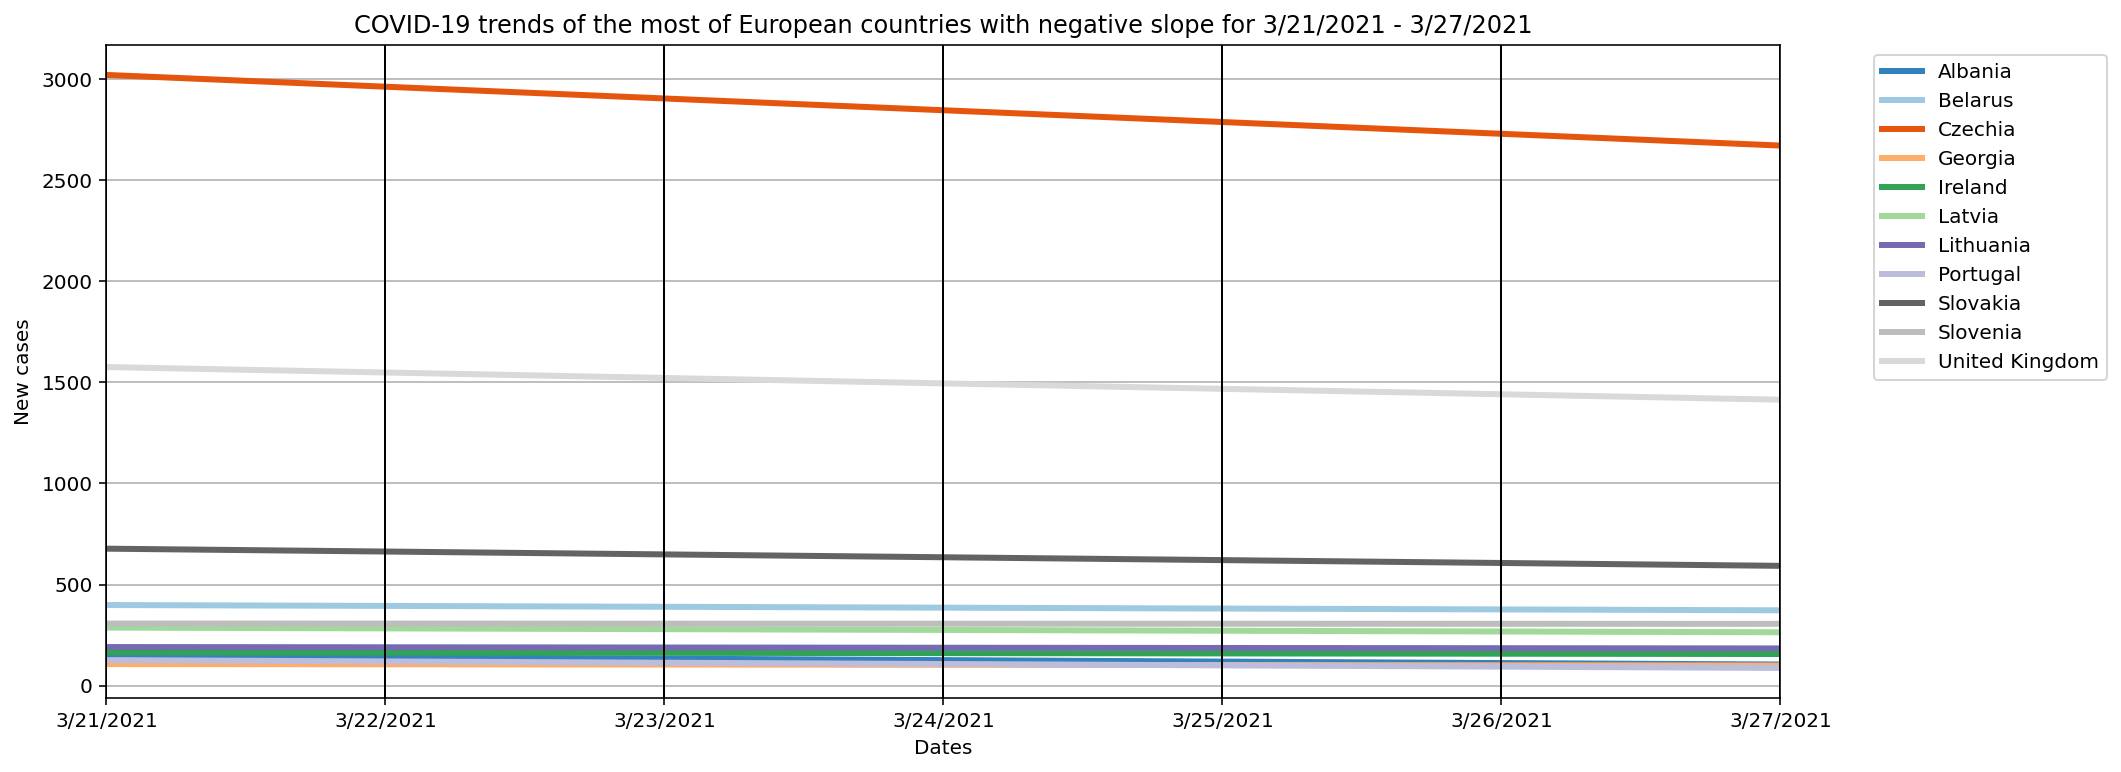

In [25]:
title = f"COVID-19 trends of the most of European countries with negative slope for {ds_start} - {ds_end}"
plot_feature_parallel(df3_eu[df3_eu['slope'] < 0][['country'] + forecast_dates], title)

In [26]:
df3_for_UA = df3_eu[(df3_eu['slope'] > -100) & (df3_eu['slope'] < -1)]
df3_for_UA.sort_values(by=['slope'], ascending=False)

country    3/21/2021    3/22/2021    3/23/2021    3/24/2021  \
17       Lithuania   191.160951   190.015590   188.870229   187.724868   
10         Georgia   106.966700   105.771384   104.576068   103.380752   
14         Ireland   165.502460   164.029403   162.556346   161.083289   
16          Latvia   287.255276   283.415639   279.576001   275.736364   
2          Belarus   398.916344   394.572503   390.228662   385.884821   
22        Portugal   126.571286   120.112054   113.652822   107.193590   
0          Albania   148.303580   141.045055   133.786531   126.528006   
25        Slovakia   677.596654   663.450633   649.304612   635.158592   
28  United Kingdom  1575.641904  1548.722119  1521.802334  1494.882549   
5          Czechia  3020.097755  2961.888227  2903.678700  2845.469172   

      3/25/2021    3/26/2021    3/27/2021     slope_n      slope  
17   186.579507   185.434146   184.288786   -6.872165  -1.145361  
10   102.185435   100.990119    99.794803   -7.171896  -1.195316  
14   159.610232   158.137175   156.664118   -8.838342  -1.473057  
16   271.896726   268.057089   264.217451  -23.037825  -3.839637  
2    381.540979   377.197138   372.853297  -26.063047  -4.343841  
22   100.734358    94.275127    87.815895  -38.755391  -6.459232  
0    119.269482   112.010957   104.752432  -43.551148  -7.258525  
25   621.012571   606.866550   592.720529  -84.876125 -14.146021  
28  1467.962764  1441.042979  1414.123194 -161.518710 -26.919785  
5   2787.259644  2729.050116  2670.840588 -349.257167 -58.209528

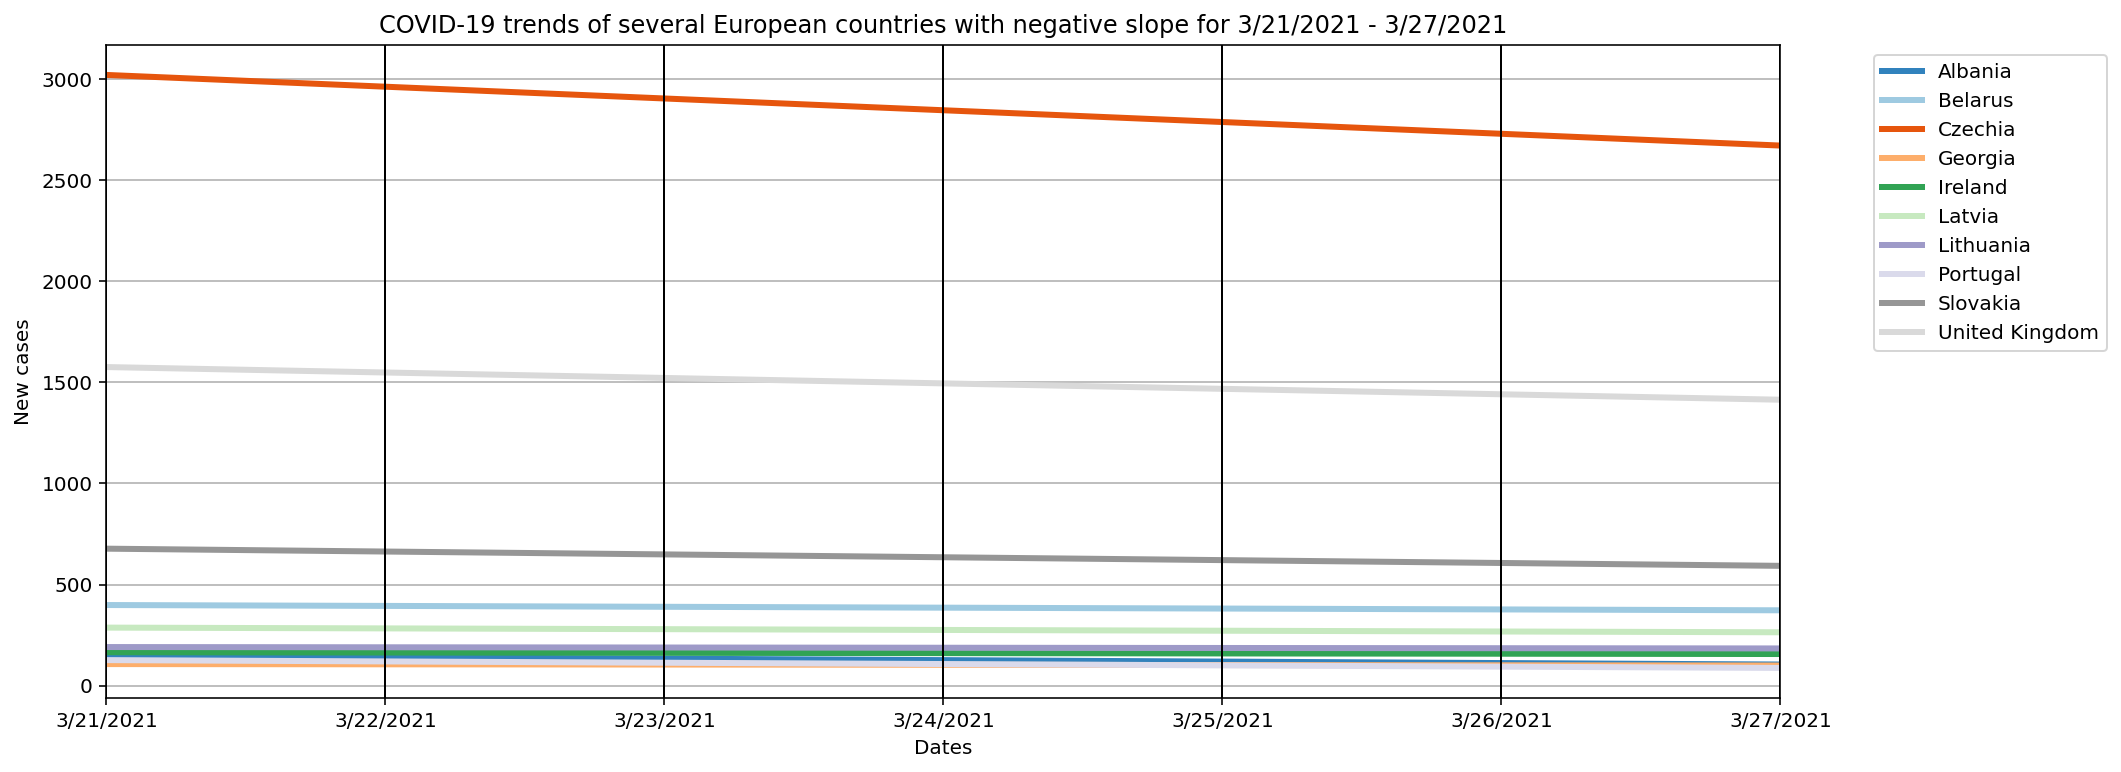

In [27]:
title = f"COVID-19 trends of several European countries with negative slope for {ds_start} - {ds_end}"
plot_feature_parallel(df3_for_UA[['country'] + forecast_dates], title)

In [28]:
df4 = pd.concat([df3[['country', 'slope']], df3_add[['country', 'slope']]]).reset_index(drop=True)
df4.sort_values(by=['slope'], ascending=False).style.set_caption('The slope of all countries trends')

In [29]:
df4_eu = df4[df4['country'].isin(country_eu)].reset_index(drop=True)
df4_eu[['country', 'slope']].sort_values(by=['slope'], ascending=False).style.set_caption('The slope of European countries trends')

In [30]:
# Download coordinates of the capitals of countries
world_coordinates = pd.read_csv("E:/github/COVID-19 US County JHU Data & Demographics/worldcities.csv")
world_coordinates = world_coordinates[world_coordinates['capital'] == 'primary']
non_main_capital_now = ['Bujumbura', 'The Hague', 'Cape Town', 'Bloemfontein']
world_coordinates = world_coordinates[~world_coordinates['city_ascii'].isin(non_main_capital_now)]
world_coordinates = world_coordinates[['city_ascii', 'lat', 'lng', 'country']]
world_coordinates

city_ascii      lat       lng       country
0           Tokyo  35.6850  139.7514         Japan
2     Mexico City  19.4424  -99.1310        Mexico
9           Dhaka  23.7231   90.4086    Bangladesh
10   Buenos Aires -34.6025  -58.3975     Argentina
12          Cairo  30.0500   31.2500         Egypt
..            ...      ...       ...           ...
600       Al Quds  31.7764   35.2269     West Bank
601   Philipsburg  18.0255  -63.0450  Sint Maarten
602        Gitega  -3.4271   29.9246       Burundi
603      Pristina  42.6666   21.1724        Kosovo
604     Ngerulmud   7.5000  134.6242         Palau

[208 rows x 4 columns]

In [31]:
# Merging the coordinates dataframe with original dataframe
world_data = pd.merge(df4, world_coordinates, on='country', how='left').dropna().reset_index(drop=True)
world_data

country       slope     city_ascii      lat       lng
0              Albania   -7.258525         Tirana  41.3275   19.8189
1            Argentina   25.212122   Buenos Aires -34.6025  -58.3975
2            Australia   -0.012826       Canberra -35.2830  149.1290
3              Austria   15.765815         Vienna  48.2000   16.3666
4           Bangladesh   30.318872          Dhaka  23.7231   90.4086
5              Belarus   -4.343841          Minsk  53.9000   27.5666
6               Brazil  372.284344       Brasilia -15.7833  -47.9161
7             Bulgaria   39.702105          Sofia  42.6833   23.3167
8               Canada    9.492410         Ottawa  45.4167  -75.7000
9                Chile   34.549212       Santiago -33.4500  -70.6670
10               China   -0.654609        Beijing  39.9289  116.3883
11            Colombia   32.071722         Bogota   4.5964  -74.0833
12             Croatia    9.598885         Zagreb  45.8000   16.0000
13             Czechia  -58.209528         Prague  50.0833   14.4660
14             Denmark    3.952480     Copenhagen  55.6786   12.5635
15  Dominican Republic   -7.052711  Santo Domingo  18.4701  -69.9001
16               Egypt    0.375658          Cairo  30.0500   31.2500
17             Estonia    2.546495        Tallinn  59.4339   24.7280
18             Finland    3.733568       Helsinki  60.1756   24.9341
19              France   45.165092          Paris  48.8667    2.3333
20             Georgia   -1.195316        Tbilisi  41.7250   44.7908
21             Germany  131.860043         Berlin  52.5218   13.4015
22              Greece   11.165195         Athens  37.9833   23.7333
23            Honduras   -4.536163    Tegucigalpa  14.1020  -87.2175
24             Hungary   82.990883       Budapest  47.5000   19.0833
25               India  524.041263      New Delhi  28.6000   77.2000
26           Indonesia  -31.958022        Jakarta  -6.1744  106.8294
27             Ireland   -1.473057         Dublin  53.3331   -6.2489
28              Israel  -38.453092      Jerusalem  31.7784   35.2066
29               Italy   54.353266           Rome  41.8960   12.4833
30               Japan    8.180001          Tokyo  35.6850  139.7514
31               Kenya   14.948609        Nairobi  -1.2833   36.8167
32              Latvia   -3.839637           Riga  56.9500   24.1000
33           Lithuania   -1.145361        Vilnius  54.6834   25.3166
34            Malaysia  -20.195729   Kuala Lumpur   3.1667  101.7000
35              Mexico  -60.911266    Mexico City  19.4424  -99.1310
36             Moldova    4.869133       Chisinau  47.0050   28.8577
37             Morocco    0.411607          Rabat  34.0253   -6.8361
38         Netherlands   38.153018      Amsterdam  52.3500    4.9166
39         New Zealand   -0.004460     Wellington -41.3000  174.7833
40             Nigeria  -10.381874          Abuja   9.0833    7.5333
41              Norway   10.027854           Oslo  59.9167   10.7500
42            Pakistan   38.291639      Islamabad  33.7000   73.1666
43            Paraguay   22.153435       Asuncion -25.2964  -57.6415
44         Philippines   88.427869         Manila  14.6042  120.9822
45              Poland  229.485653         Warsaw  52.2500   21.0000
46            Portugal   -6.459232         Lisbon  38.7227   -9.1449
47             Romania   35.948136      Bucharest  44.4334   26.0999
48              Serbia   27.500949       Belgrade  44.8186   20.4680
49           Singapore   -0.099402      Singapore   1.2930  103.8558
50            Slovakia  -14.146021     Bratislava  48.1500   17.1170
51            Slovenia   -0.228402      Ljubljana  46.0553   14.5150
52        South Africa    1.410307       Pretoria -25.7069   28.2294
53             Ukraine  127.518723           Kyiv  50.4334   30.5166
54      United Kingdom  -26.919785         London  51.5000   -0.1167
55       United States -185.500783     Washington  38.9047  -77.0163
56             Vietnam   -0.364379          Hanoi  21.0333  105.8500
57           

In [32]:
world_data_grow = world_data[world_data['slope'] >= 0]
world_data_reduce = world_data[world_data['slope'] < 0]
world_data_reduce['slope'] = world_data_reduce['slope'].abs()

In [33]:
print(f'Creation and display map with layers control window for screenshots with a small scale of this map (COVID-19 new cases forecasting: {ds_start} - {ds_end})')

Creation and display map with layers control window for screenshots with a small scale of this map (COVID-19 new cases forecasting: 3/21/2021 - 3/27/2021)


In [34]:
# Create map and display it
# Big circle - for screenshots of the map on a small scale with control window
world_map = folium.Map(location=[10, -20], zoom_start=2.3, tiles='Stamen Toner')
r0 = 0.75
r1 = 0.02
group0 = folium.FeatureGroup(name='<span style=\\"color: red;\\">red circles</span>')
for lat, lon, value, name in zip(world_data_grow['lat'], world_data_grow['lng'], world_data_grow['slope'], world_data_grow['country']):
    folium.CircleMarker([lat, lon],
                        radius=r0 + value*r1,
                        popup = ('<strong>country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>slope trend</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(group0)
group0.add_to(world_map)

group1 = folium.FeatureGroup(name='<span style=\\"color: red;\\">blue circles</span>')
for lat, lon, value, name in zip(world_data_reduce['lat'], world_data_reduce['lng'], world_data_reduce['slope'], world_data_reduce['country']):
    folium.CircleMarker([lat, lon],
                        radius=r0 + value*r1,
                        popup = ('<strong>country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>slope trend</strong>: ' + str(value) + '<br>'),
                        color='blue',
                        
                        fill_color='blue',
                        fill_opacity=0.7 ).add_to(group1)
group1.add_to(world_map)
folium.map.LayerControl('topright', collapsed=False).add_to(world_map)


world_map

In [35]:
print(f'Creation and display map with layers control window for screenshots with a big scale of this map (COVID-19 new cases forecasting: {ds_start} - {ds_end})')

Creation and display map with layers control window for screenshots with a big scale of this map (COVID-19 new cases forecasting: 3/21/2021 - 3/27/2021)


In [36]:
# Create map and display it
# Big circle - for screenshots of the map on a big scale
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')
r0 = 2
r1 = 0.03
for lat, lon, value, name in zip(world_data_grow['lat'], world_data_grow['lng'], world_data_grow['slope'], world_data_grow['country']):
    folium.CircleMarker([lat, lon],
                        radius=r0 + value*r1,
                        popup = ('<strong>country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>slope trend</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
    
for lat, lon, value, name in zip(world_data_reduce['lat'], world_data_reduce['lng'], world_data_reduce['slope'], world_data_reduce['country']):
    folium.CircleMarker([lat, lon],
                        radius=r0 + value*r1,
                        popup = ('<strong>country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>slope trend</strong>: ' + str(value) + '<br>'),
                        color='blue',
                        
                        fill_color='blue',
                        fill_opacity=0.7 ).add_to(world_map)

world_map

In [37]:
import numpy as np
import pandas as pd
from datetime import datetime

#modeling
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

#visuals
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [39]:
# worldometer population statistics
worldpop = pd.read_csv("E:/github/COVID-19 US County JHU Data & Demographics/World_population(2020).csv")

# jhu data at US county level and county stats
us_county = pd.read_csv("E:/github/COVID-19 US County JHU Data & Demographics/us_county.csv")
us_covid = pd.read_csv("E:/github/COVID-19 US County JHU Data & Demographics/covid_us_county.csv")

In [40]:
# John Hopkins University (JHU) data at global level - until 12/29/20
jhu_global_meta = pd.read_csv("E:/github/COVID-19 US County JHU Data & Demographics/CONVENIENT_global_metadata.csv")
jhu_global_confirmed = pd.read_csv("E:/github/COVID-19 US County JHU Data & Demographics/CONVENIENT_global_confirmed_cases.csv")
jhu_global_deaths = pd.read_csv("E:/github/COVID-19 US County JHU Data & Demographics/CONVENIENT_global_deaths.csv")

In [41]:
# raw JHU data as it is downloaded from repository
jhu_raw_deaths = pd.read_csv("E:/github/COVID-19 US County JHU Data & Demographics/RAW_global_deaths.csv")

In [42]:
#global confirmed cases data
jhu_global_confirmed.head()

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
0  Province/State          NaN      NaN      NaN      NaN     NaN   
1         1/23/20          0.0      0.0      0.0      0.0     0.0   
2         1/24/20          0.0      0.0      0.0      0.0     0.0   
3         1/25/20          0.0      0.0      0.0      0.0     0.0   
4         1/26/20          0.0      0.0      0.0      0.0     0.0   

   Antigua and Barbuda  Argentina  Armenia                     Australia  \
0                  NaN        NaN      NaN  Australian Capital Territory   
1                  0.0        0.0      0.0                           0.0   
2                  0.0        0.0      0.0                           0.0   
3                  0.0        0.0      0.0                           0.0   
4                  0.0        0.0      0.0                           0.0   

       Australia.1         Australia.2 Australia.3      Australia.4  \
0  New South Wales  Northern Territory  Queensland  South Australia   
1              0.0                 0.0         0.0              0.0   
2              0.0                 0.0         0.0              0.0   
3              0.0                 0.0         0.0              0.0   
4              3.0                 0.0         0.0              0.0   

  Australia.5 Australia.6        Australia.7  Austria  Azerbaijan  Bahamas  \
0    Tasmania    Victoria  Western Australia      NaN         NaN      NaN   
1         0.0         0.0                0.0      0.0         0.0      0.0   
2         0.0         0.0                0.0      0.0         0.0      0.0   
3         0.0         0.0                0.0      0.0         0.0      0.0   
4         0.0         1.0                0.0      0.0         0.0      0.0   

   Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bhutan  \
0      NaN         NaN       NaN      NaN      NaN     NaN    NaN     NaN   
1      0.0         0.0       0.0      0.0      0.0     0.0    0.0     0.0   
2      0.0         0.0       0.0      0.0      0.0     0.0    0.0     0.0   
3      0.0         0.0       0.0      0.0      0.0     0.0    0.0     0.0   
4      0.0         0.0       0.0      0.0      0.0     0.0    0.0     0.0   

   Bolivia  Bosnia and Herzegovina  Botswana  Brazil  Brunei  Bulgaria  \
0      NaN                     NaN       NaN     NaN     NaN       NaN   
1      0.0                     0.0       0.0     0.0     0.0       0.0   
2      0.0                     0.0       0.0     0.0     0.0       0.0   
3      0.0                     0.0       0.0     0.0     0.0       0.0   
4      0.0                     0.0       0.0     0.0     0.0       0.0   

   Burkina Faso  Burma  Burundi  Cabo Verde  Cambodia  Cameroon   Canada  \
0           NaN    NaN      NaN         NaN       NaN       NaN  Alberta   
1           0.0    0.0      0.0         0.0       0.0       0.0      0.0   
2           0.0    0.0      0.0         0.0       0.0       0.0      0.0   
3           0.0    0.0      0.0         0.0       0.0       0.0      0.0   
4           0.0    0.0      0.0         0.0       0.0       0.0      0.0   

           Canada.1          Canada.2        Canada.3  Canada.4  \
0  British Columbia  Diamond Princess  Grand Princess  Manitoba   
1               0.0               0.0             0.0       0.0   
2               0.0               0.0             0.0       0.0   
3               0.0               0.0             0.0       0.0   
4               0.0               0.0             0.0       0.0   

        Canada.5                   Canada.6               Canada.7  \
0  New Brunswick  Newfoundland and Labrador  Northwest Territories   
1            0.0                        0.0                    0.0   
2            0.0                        0.0                    0.0   
3            0.0                        0.0                    0.0   
4            0.0                        0.0                    0.0   

      Canada.8 Canada.9 Canada.10             

In [43]:
# checking last updated date
jhu_raw_deaths.head().iloc[:,[0,1,2,3,-4,-3,-2,-1]]

Country/Region Province/State       Lat       Long  4/20/21  4/21/21  \
0    Afghanistan            NaN  33.93911  67.709953     2549     2557   
1        Albania            NaN  41.15330  20.168300     2353     2358   
2        Algeria            NaN  28.03390   1.659600     3165     3172   
3        Andorra            NaN  42.50630   1.521800      123      123   
4         Angola            NaN -11.20270  17.873900      565      570   

   4/22/21  4/23/21  
0     2561     2565  
1     2364     2367  
2     3181     3190  
3      123      123  
4      572      574

In [44]:
# checking for na values
jhu_raw_deaths[jhu_raw_deaths.drop(columns=['Province/State','Lat','Long']).isna().any(axis=1)]

Empty DataFrame
Columns: [Country/Region, Province/State, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

Autoregression Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                     US   No. Observations:                  457
Model:             Restr. AutoReg(30)   Log Likelihood               -4785.115
Method:               Conditional MLE   S.D. of innovations          17808.298
Date:                Sun, 01 Jan 2023   AIC                             19.598
Time:                        04:51:01   BIC                             19.646
Sample:                    02-22-2020   HQIC                            19.617
                         - 04-23-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3129.4456   1326.316      2.360      0.018     529.914    5728.978
US.L1          0.8050      0.031     25.909      0.000       0.744       0.866
US.L10         0.2282      0.037      6.108      0.000       0.155       0.301
US.L30        -0.0734      0.023     -3.181      0.001      -0.119      -0.028
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0200           -0.0287j            1.0204           -0.0045
AR.2             1.0200           +0.0287j            1.0204            0.0045
AR.3             1.0320           -0.3176j            1.0798           -0.0475
AR.4             1.0320           +0.3176j            1.0798            0.0475
AR.5             0.9043           -0.5000j            1.0333           -0.0804
AR.6             0.9043           +0.5000j            1.0333            0.0804
AR.7             0.8446           -0.6763j            1.0821           -0.1075
AR.8             0.8446           +0.6763j            1.0821            0.1075
AR.9             0.6675           -0.8765j            1.1018           -0.1464
AR.10            0.6675           +0.8765j            1.1018            0.1464
AR.11            0.4562           -0.9706j            1.0724           -0.1801
AR.12            0.4562           +0.9706j            1.0724            0.1801
AR.13            0.2756           -1.0632j            1.0984           -0.2096
AR.14            0.2756           +1.0632j            1.0984            0.2096
AR.15            0.0206           -1.1152j            1.1154           -0.2471
AR.16            0.0206           +1.1152j            1.1154            0.2471
AR.17           -0.2142           -1.0705j            1.0917           -0.2814
AR.18           -0.2142           +1.0705j            1.0917            0.2814
AR.19           -0.4173           -1.0244j            1.1062           -0.3116
AR.20           -0.4173           +1.0244j            1.1062            0.3116
AR.21           -0.6495           -0.9163j            1.1232           -0.3481
AR.22           -0.6495           +0.9163j            1.1232            0.3481
AR.23           -1.1027           -0.1056j            1.1078           -0.4848
AR.24           -1.1027           +0.1056j            1.1078            0.4848
AR.25           -1.0702           -0.3524j            1.1267           -0.4494
AR.26           -1.0702           +0.3524j            1.1267            0.4494
AR.27           -0.9489           -0.5740j            1.1090           -0.4134
AR.28           -0.9489           +0.5740j            1.1090            0.4134
AR.29           -0.8180           -0.7390j            1.1024           -0.3831
AR.30           -0.8180           +0.7390j            1.1024            0.3831
--

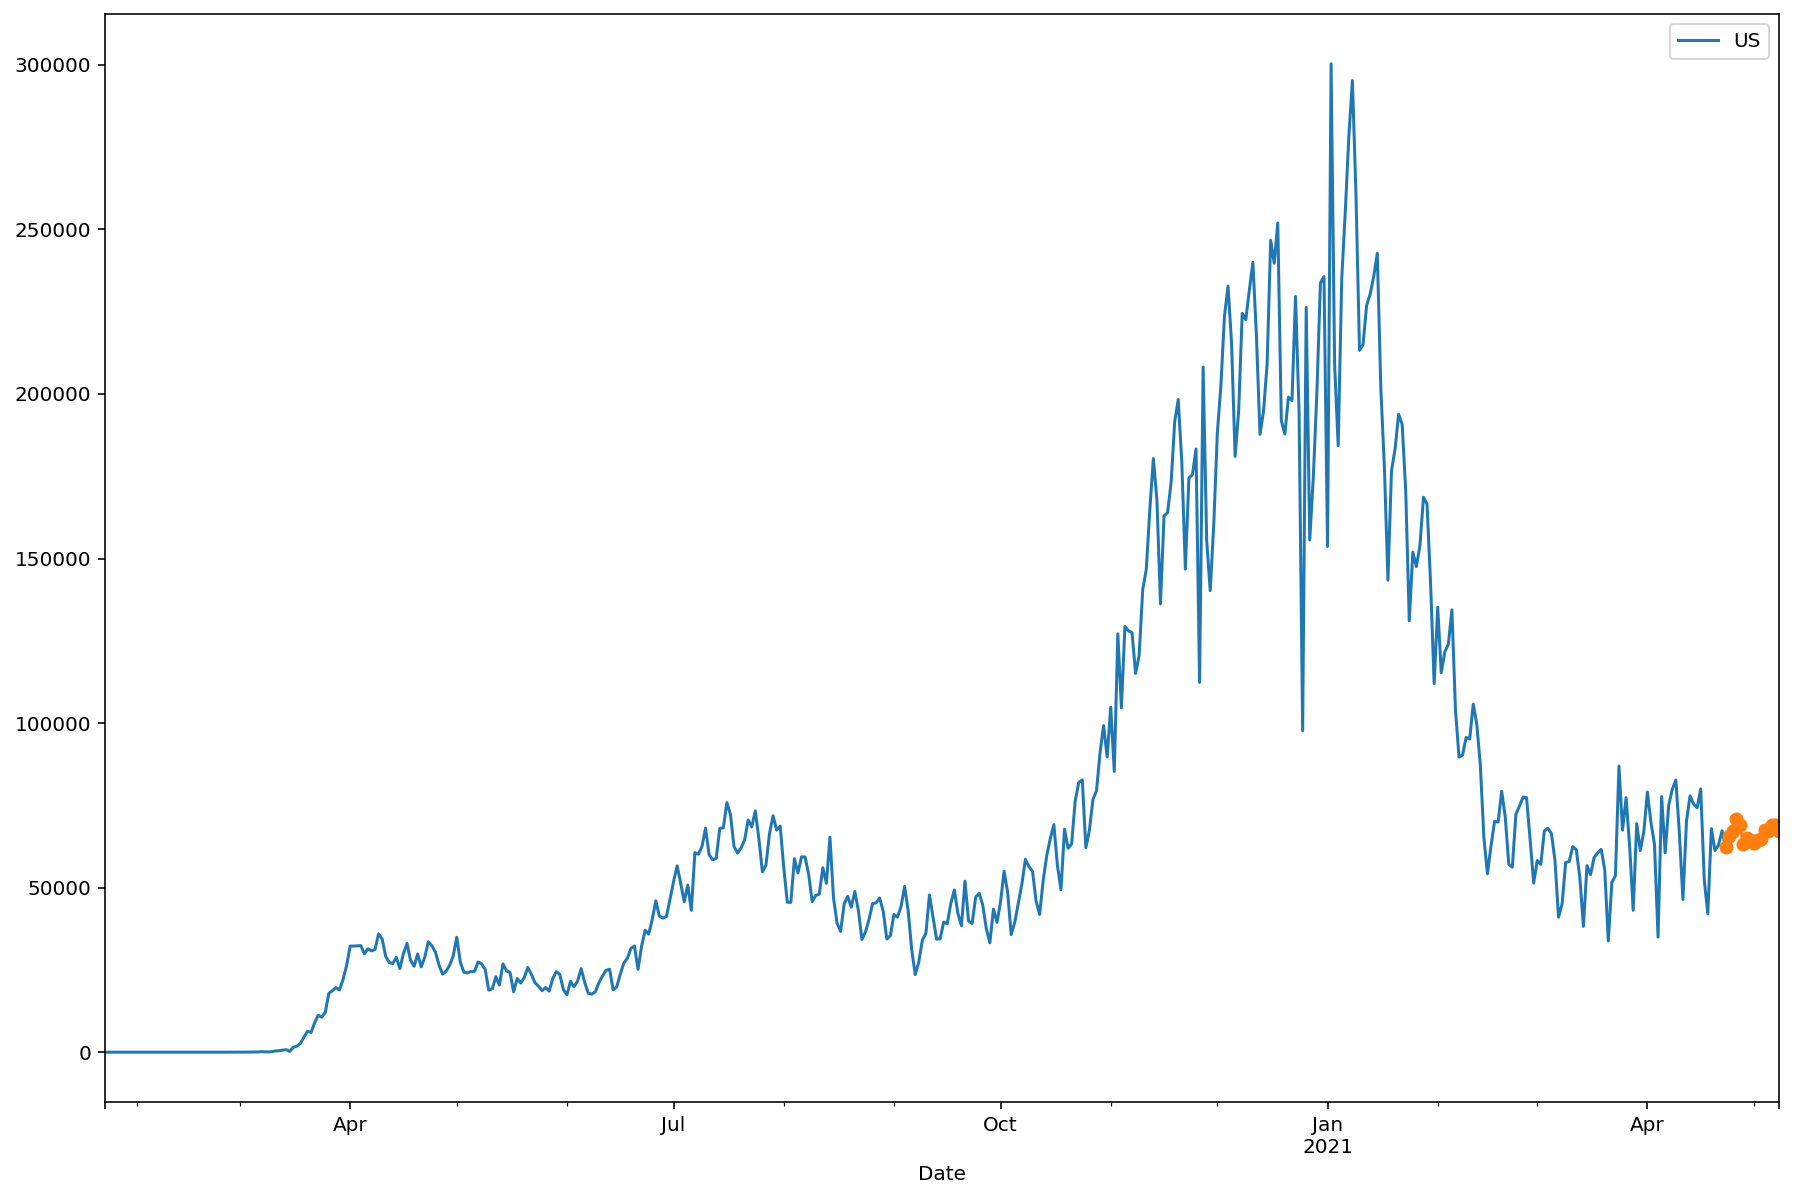

In [45]:
k = 14 #prediction horizon

# skipping first row (header row) and resetting index to begin at 0
dates = pd.to_datetime(jhu_global_confirmed['Country/Region'][1:], format="%m/%d/%y")
tempdata = pd.DataFrame(jhu_global_confirmed['US'][1:])
tempdata.index = dates
tempdata.index.freq='d' # setting time frequency to be by date
tempdata = tempdata.rename_axis('Date')

# fit model
model = AutoReg(tempdata, lags=[1,10,30])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(tempdata), len(tempdata)+k)

#plotting last recorded data point to show continuity and then forecasted data
pyhat = pd.Series(tempdata.tail(1).squeeze(), index=[tempdata.index[-1]]).append(yhat)
ax = tempdata.plot(figsize=(15,10))
pyhat.plot(marker='o',color='C1', ax=ax);
# model_fit.plot_predict(0, len(tempdata)+k)
model_fit.summary()

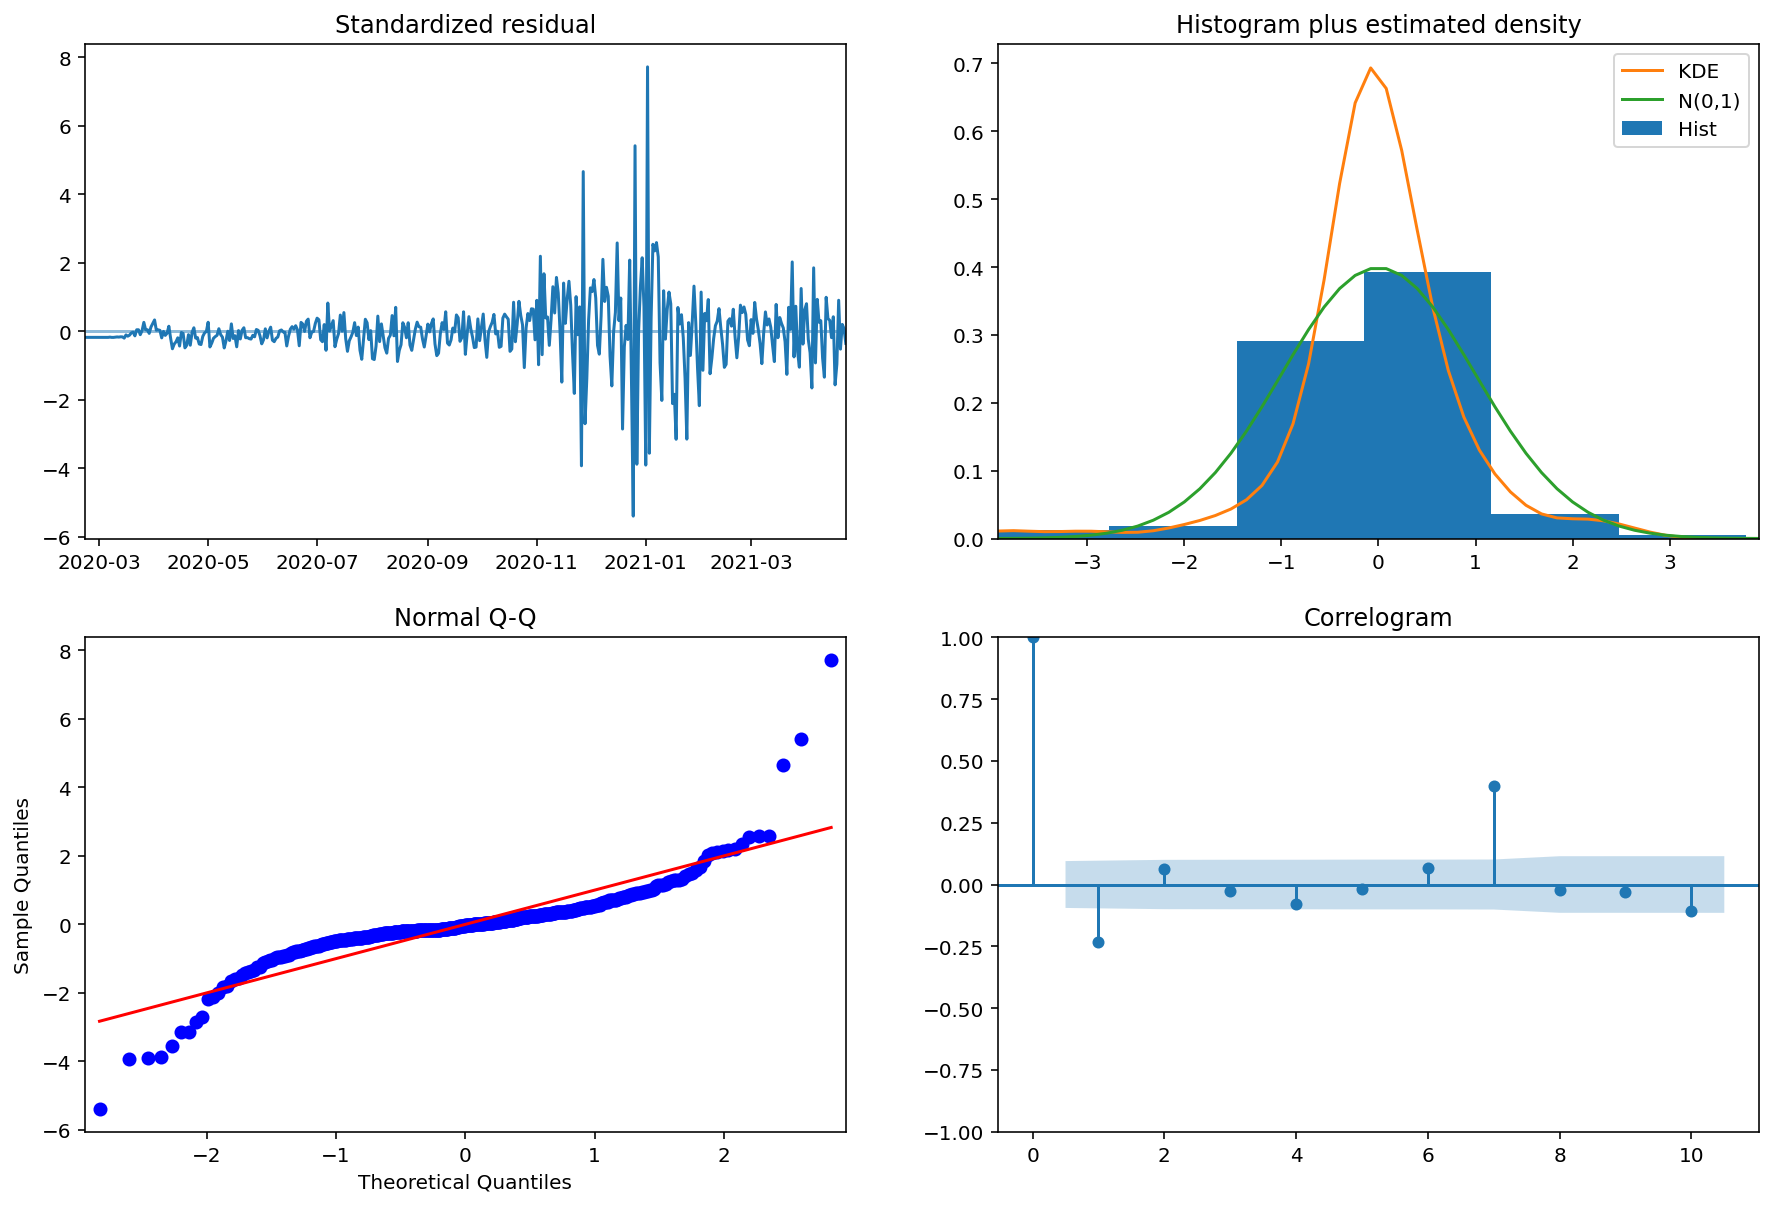

In [46]:
model_fit.plot_diagnostics(figsize=(15,10));

Data is near normal distribution. Residuals however do not exhibit homoskedacity, suggesting some trend is not captured.

Autoregressive Moving Average (ARIMA)

In [47]:
# ARIMA
k = 14 #prediction horizon

# skipping first row (header row) and resetting index to begin at 0
dates = pd.to_datetime(jhu_global_confirmed['Country/Region'][1:], format="%m/%d/%y")
tempdata = pd.DataFrame(jhu_global_confirmed['US'][1:])
tempdata.index = dates
tempdata.index.freq='d' # setting time frequency to be by date
tempdata = tempdata.rename_axis('Date')

# fit model
model = ARIMA(tempdata, order=(3, 2, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(tempdata), len(tempdata)+k, typ='levels')

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     US   No. Observations:                  457
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -5081.130
Date:                Sun, 01 Jan 2023   AIC                          10172.260
Time:                        04:51:04   BIC                          10192.862
Sample:                    01-23-2020   HQIC                         10180.376
                         - 04-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4799      0.028    -17.052      0.000      -0.535      -0.425
ar.L2         -0.2565      0.045     -5.684      0.000      -0.345      -0.168
ar.L3         -0.1143      0.048     -2.375      0.018      -0.209      -0.020
ma.L1         -0.9942      0.011    -89.793      0.000      -1.016      -0.972
sigma2      4.099e+08   4.78e-11   8.58e+18      0.000     4.1e+08     4.1e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              2411.55
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):              91.50   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.05e+34. Standard errors may be unstable.
"""

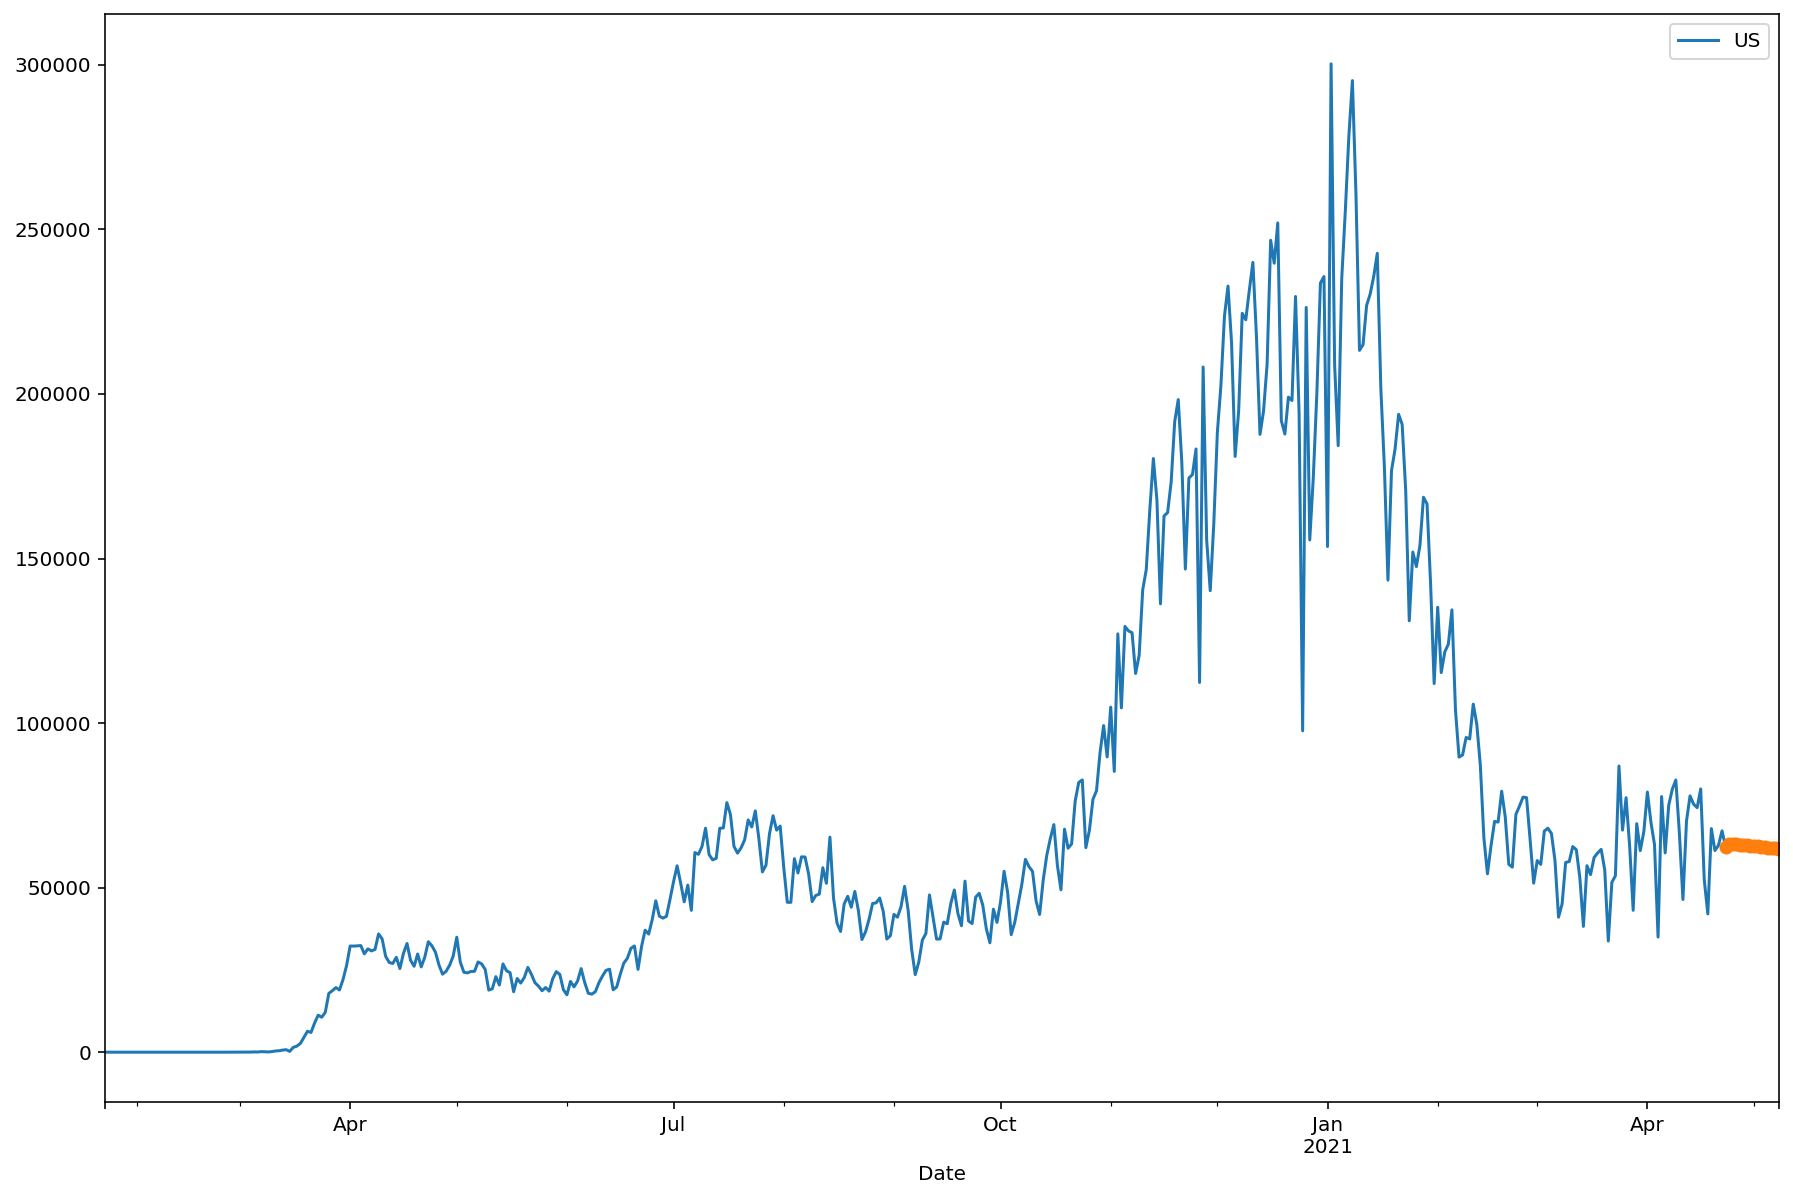

In [48]:
#plotting last recorded data point to show continuity and then forecasted data
pyhat = pd.Series(tempdata.tail(1).squeeze(), index=[tempdata.index[-1]]).append(yhat)
ax = tempdata.plot(figsize=(15,10))
pyhat.plot(marker='o',color='C1', ax=ax);
# model_fit.plot_predict(0, len(tempdata)+k)
model_fit.summary()

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.45e+33. Standard errors may be unstable. 

In [49]:
model_fit.get_prediction(len(tempdata), len(tempdata)+k)

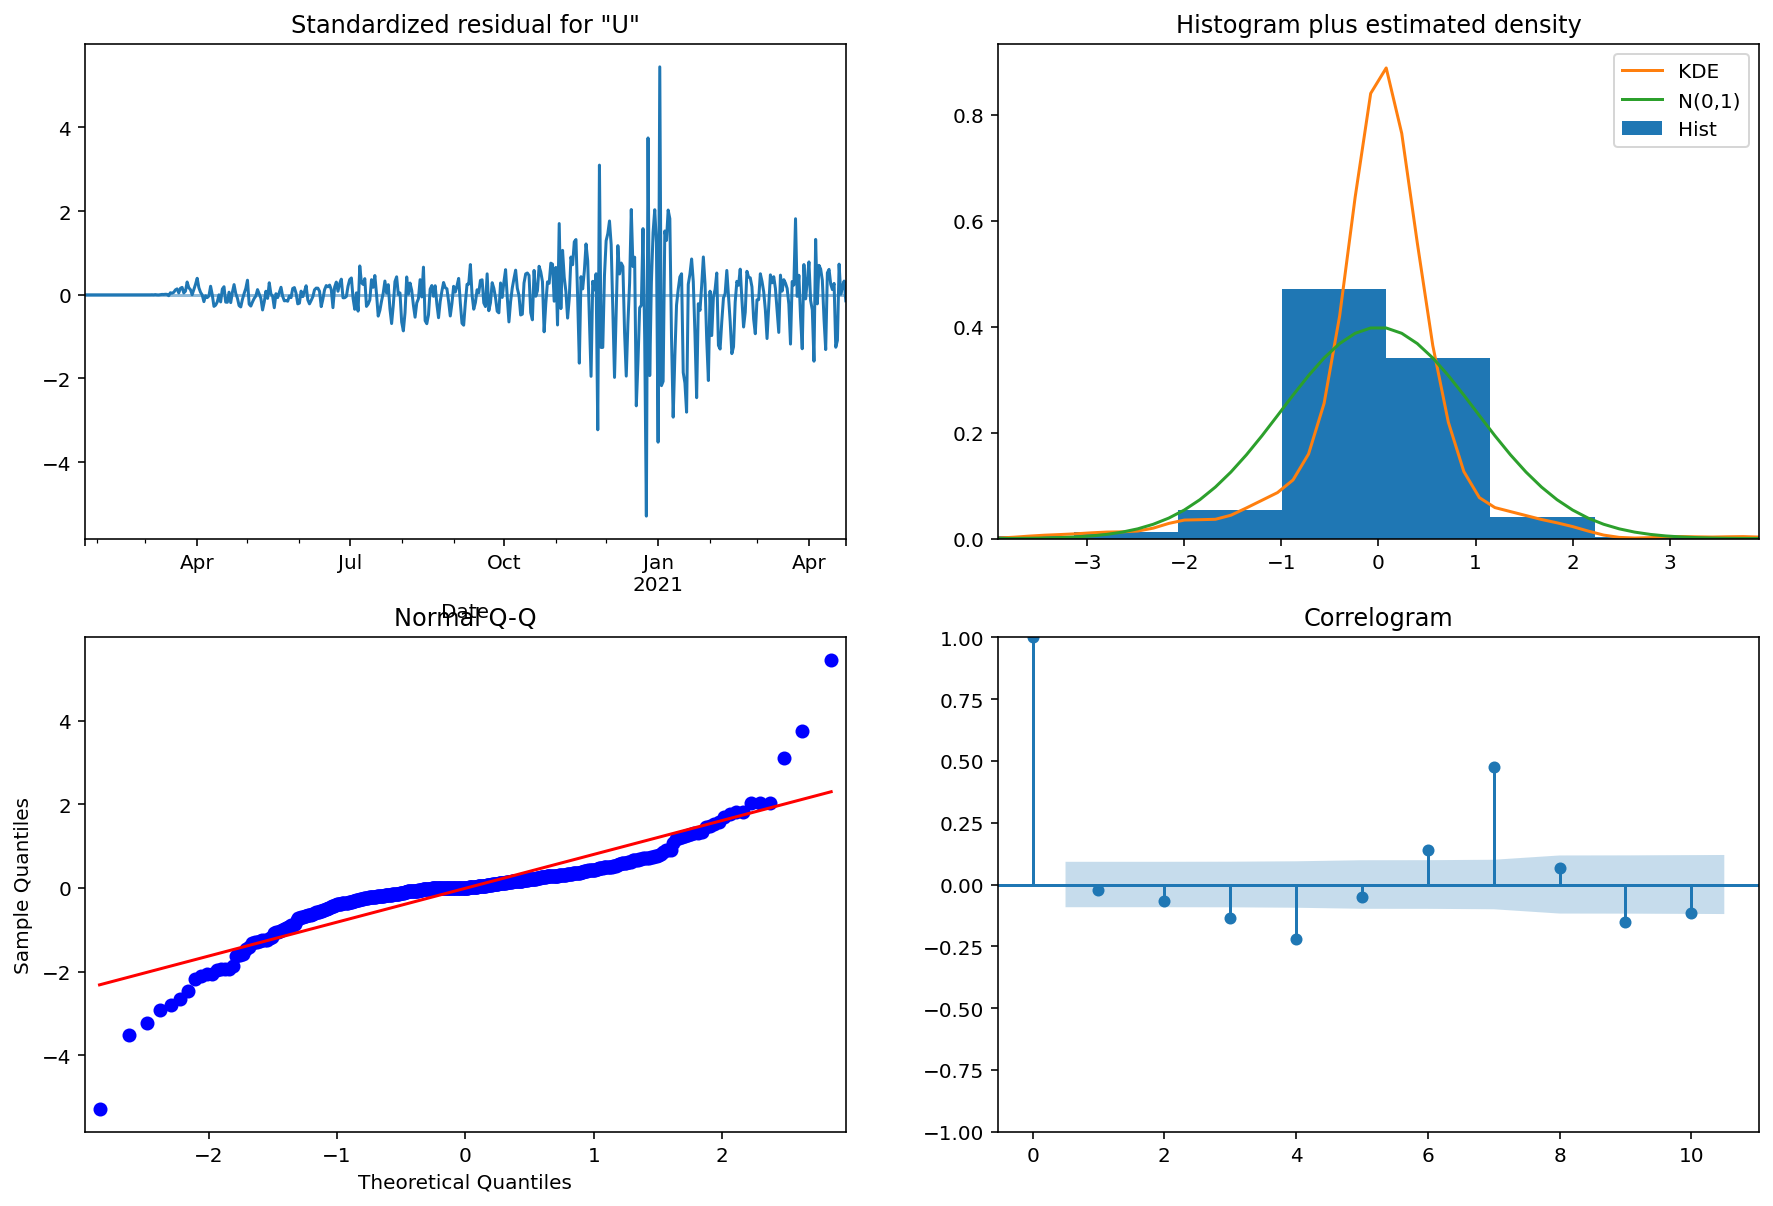

In [50]:
model_fit.plot_diagnostics(figsize=(15,10));

In [51]:
fig = px.line(tempdata.reset_index(),x='Date',y='US')
fig.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

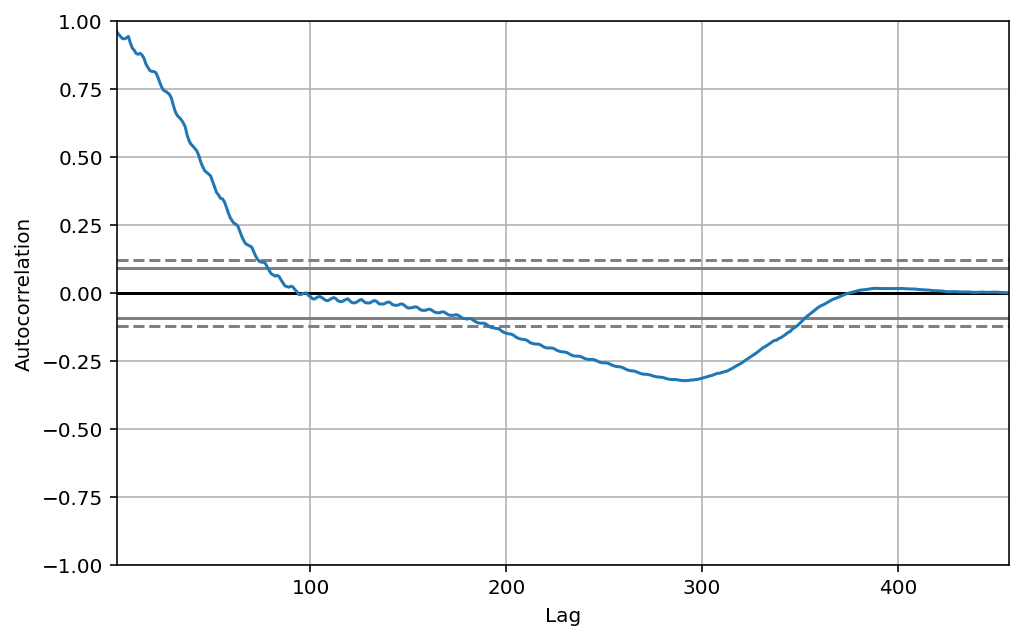

In [52]:
autocorrelation_plot(tempdata)